# Reseaux de neurones simple 


In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing, load_digits

Imoprt DataSet et Normalisation

In [51]:
dataset = fetch_california_housing()

In [52]:
data = np.asarray(dataset.data, dtype='float32')[0:500,:]
target = np.asarray(dataset.target.reshape(-1, 1), dtype='float32')[0:500,:]

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2,random_state=42)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

# Layer

In [53]:
class Layer:
    def __init__(self):
        self.layer_type = 'abstract'

    def forward(self, inputs):
        pass
    
    def backward(self, grad):
        pass

# Lneair

Couche Lineair simple avec une matrice de poids $W$ et de biais $b$.  
Ces couches reçoivent en entrée un vecteur $x$ et retournent en sortie le résultat de $xW + b$.


In [54]:
class Linear(Layer):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.layer_type = 'linear'
        self.params ={}
        self.grads = {}
        self.params["weights"] = np.random.uniform(size=(input_size, output_size), high=0.1, low=-0.1)
        self.params["bias"] = np.random.uniform(size=output_size, high=0.1, low=-0.1)

    def forward(self, inputs):
        self.inputs = inputs
        return np.matmul(inputs, self.params["weights"]) + self.params["bias"]
    
    def backward(self, grad):
        self.grads["weights"] = np.matmul(self.inputs.T, grad)
        self.grads["bias"] = np.sum(grad, axis=0)
        return np.matmul(grad, self.params["weights"].T)

## Activation 

ReLU: $f(x) = max(0,x)$

In [55]:
def relu(x):
    return np.maximum(0,x)

def relu_prime(x):
    return np.where(x > 0, 1.0, 0.0)

In [56]:
class Activation(Layer):
    def __init__(self, f, f_prime):
        super().__init__()
        self.layer_type = 'activation'
        self.f = f
        self.f_prime = f_prime

    def forward(self, inputs):
        self.intputs = inputs
        return self.f(self.intputs)
    
    def backward(self, grad):
        return self.f_prime(self.intputs) * grad

## Neural network

In [57]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, inputs):
        for layer in (self.layers):
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, grad):
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
        return grad      

In [58]:
layer1 = Linear(input_size=8, output_size=40)
activation1 = Activation(f=relu, f_prime=relu_prime)

layer2 = Linear(input_size=40, output_size=40)
activation2 = Activation(f=relu, f_prime=relu_prime)

layer3 = Linear(input_size=40, output_size=1)

layers = [layer1, activation1, layer2, activation2, layer3]

net = NeuralNetwork(layers)

# Loss function

In [59]:
class MSE():

    def loss(self, y_pred, y_true):
        
        return np.mean((y_pred - y_true) ** 2)
    
    def grad(self, y_pred, y_true):
        
        return 2*(y_pred - y_true)

# Optimizer

In [60]:
class SGD():
    def __init__(self, lr=0.001):
        self.lr = lr
    
    def step(self, net):
        for layer in net.layers:
            if layer.layer_type == 'linear':
                for param, grad in zip(layer.params.values(), layer.grads.values()):
                    param -= self.lr * grad

# Fit function

In [61]:
def fit(net, loss, optimizer, X, y):
    y_pred = net.forward(X)
    prediction_loss = loss.loss(y_pred, y)
    grad = loss.grad(y_pred, y)
    net.backward(grad)
    optimizer.step(net)
    return prediction_loss

In [62]:
optimizer = SGD(lr=0.01)
loss = MSE()


Entrainnement sur 15 epoch

#################Epoch0##############
loss =  0.45160709367841834
#################Epoch1##############
loss =  0.41815443983612605
#################Epoch2##############
loss =  0.26367429953008703
#################Epoch3##############
loss =  0.18550847227930728
#################Epoch4##############
loss =  0.1356344521016171
#################Epoch5##############
loss =  0.10788194549456787
#################Epoch6##############
loss =  0.07675013433169306
#################Epoch7##############
loss =  0.0799104777366418
#################Epoch8##############
loss =  0.08945236336125865
#################Epoch9##############
loss =  0.061653393258714856
#################Epoch10##############
loss =  0.08059695157666613
#################Epoch11##############
loss =  0.05952576104887569
#################Epoch12##############
loss =  0.0662997096599854
#################Epoch13##############
loss =  0.052813016376741954
#################Epoch14##############
loss =  0.07684281622380162
mean a

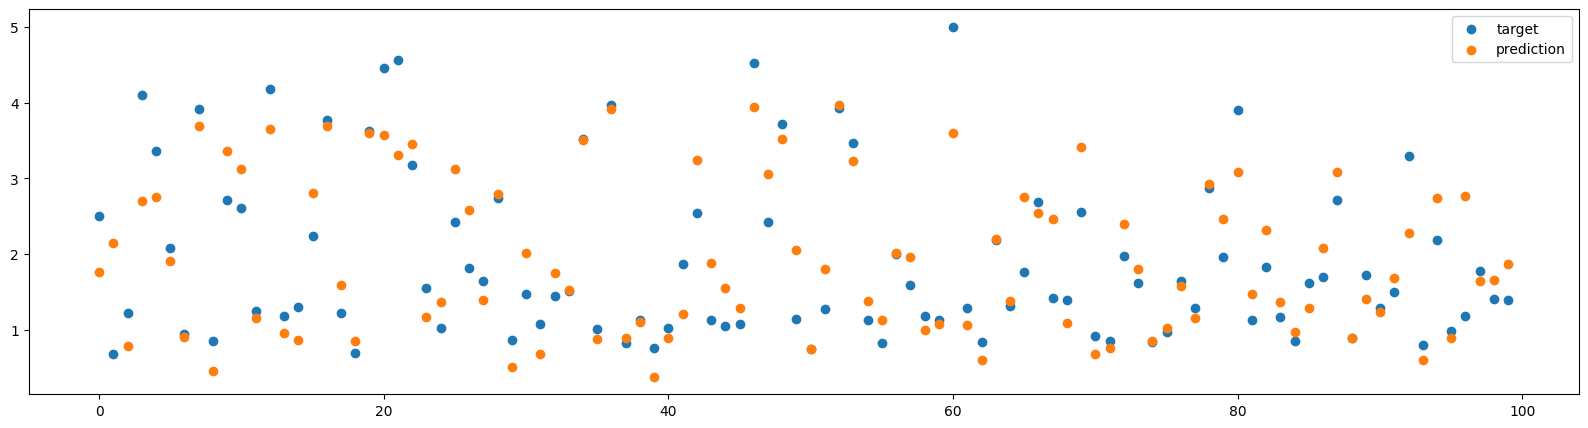

In [63]:
for epoch in range(15):
  print("#################Epoch{}##############".format(epoch))
  for i, (x, y) in enumerate(zip(X_train, y_train)):
      training_loss = fit(net, loss, optimizer, np.array([x]), np.array([y]))
  print("loss = ", training_loss)

y_pred = net.forward(X_test)
print('mean absolute error: ', mean_absolute_error(y_pred, y_test))

plt.figure(figsize=(20,5))
plt.scatter(range(len(y_test)), scaler.inverse_transform(y_test), label='target')
plt.scatter(range(len(y_test)), scaler.inverse_transform(y_pred), label='prediction')
plt.legend()

**Classification**

In [168]:
dataset = load_digits()

In [169]:
data = np.asarray(dataset.data, dtype='float32')
target = np.asarray(dataset.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cross entropy




$$
\begin{align}
 L(\hat{y}, c) &= -log(\frac{e^{\hat{y_c}}}{\sum_{i}^{C}e^\hat{y_c}_k}) \\ 
 &= - \hat{y_c} + log(\sum_{i}^{C}e^\hat{y_c}_k)
 \end{align}
 $$

In [170]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

class CrossEntropy():

    def loss(self, logits, y_true):
        logits_for_answers = logits[np.arange(len(logits)), y_true]
        xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
        return xentropy



    def grad(self, logits, y_true):
        ones_for_answers = np.zeros_like(logits)
        ones_for_answers[np.arange(len(logits)), y_true] = 1
        y_softmax = softmax(logits)
        return (- ones_for_answers + y_softmax) / logits.shape[0]

In [171]:
layer1 = Linear(input_size=64, output_size=128)
layer2 = Activation(f=relu, f_prime=relu_prime)
layer3 = Linear(input_size=128, output_size=64)
layer4 = Activation(f=relu, f_prime=relu_prime)
layer5 = Linear(input_size=64, output_size=10)

layers = [layer1, layer2, layer3,layer4,layer5]
loss = CrossEntropy()
net = NeuralNetwork(layers)
optimizer = SGD(lr=0.05)

In [172]:
from sklearn.metrics import accuracy_score

y_pred = net.forward(X_test)
print(f'accuracy:{accuracy_score(np.argmax(y_pred, axis=1), y_test)}')

accuracy:0.15185185185185185


In [173]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=True):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [174]:
def fit_one_epoch(X, y_true):
    for x, y in iterate_minibatches(X, y_true, 32):
        training_loss = fit(net, loss, optimizer, x, y)
        
    return training_loss.mean()

Entrainement sur 15 époques.  

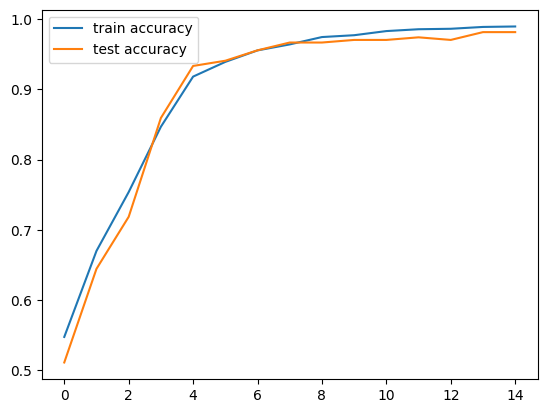

In [175]:
def accuracy(net, X, y):
    y_pred = net.forward(X)
    return accuracy_score(np.argmax(y_pred, axis=1), y),y_pred


train_acc = []
test_acc = []
for epoch in range(15):
    fit_one_epoch(X_train, y_train)
    acc_train , train_pred = accuracy(net, X_train, y_train)
    train_acc.append(acc_train)
    acc_test , test_pred = accuracy(net, X_test, y_test) 
    test_acc.append(acc_test)
    
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='test accuracy')
plt.legend()

In [176]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

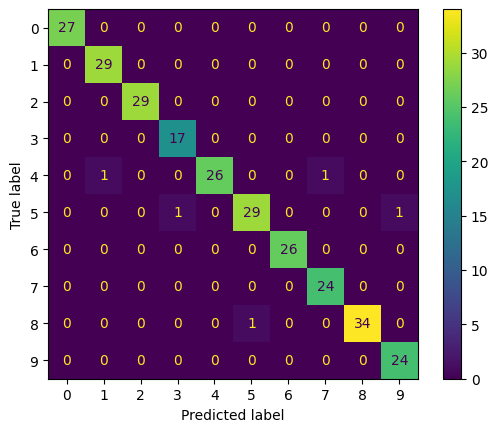

In [178]:
y_pred_ = np.argmax(test_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()